In [143]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line, geom_bar, ggtitle

1-	How much does the oil exports add to the Saudi economy?
- Oil exports from 2011 - 2020 is %81 of total exports (SAR 8,521,187 x m).
- Non-Oil exports from 2011 - 2020 is (SAR 2,017,061 x m)
- A big drop of oil exports after 2014

In [6]:
# sheet 1.1: non-oil exports - oil exports
Trading_Oil_non_Oil= pd.read_csv('Cleaned_data/Trading20_1-1_clean.csv')
Trading_Oil_non_Oil.drop('Unnamed: 0', axis=1, inplace=True)
# also
# Exports_commodityGroup['value in Millions'].sum() - tot_oil_ex_20['value in Millions'].sum()

6504126.87474

In [215]:
Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'].round(3).to_frame()

,Oil Exports Value(Millions SAR)
0,1191052.099
1,1265550.610
2,1207080.084
3,1067091.642
4,573411.985
5,510729.487
6,638402.283
7,868442.402
8,751828.129
9,447599.225


In [ ]:
1265550.610


### Overall value of exports has been decreasing after 2014

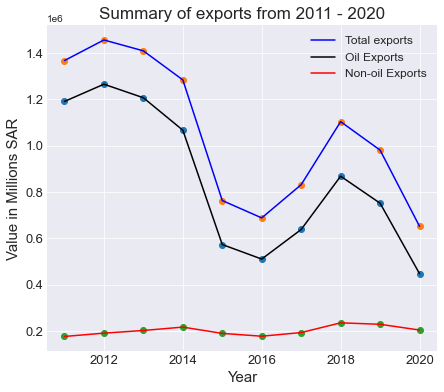

<Figure size 432x288 with 0 Axes>

In [186]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = [7,6])
plt.scatter(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'])
plt.scatter(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Total exports'])
plt.scatter(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)'])
plt.plot(Trading_Oil_non_Oil[['Year']], Trading_Oil_non_Oil[['Total exports']], c='blue', label='Total exports')
plt.plot(Trading_Oil_non_Oil[['Year']], Trading_Oil_non_Oil[['Oil Exports Value(Millions SAR)']], c='black', label='Oil Exports')
plt.plot(Trading_Oil_non_Oil[['Year']], Trading_Oil_non_Oil[['Non-oil Exports Value(millions SAR)']], c='red', label='Non-oil Exports')
plt.xlabel('Year',fontsize= 15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.ylabel('Value in Millions SAR', fontsize= 15)
plt.legend(fontsize= 12)
plt.title("Summary of exports from 2011 - 2020",fontsize= 17 )
plt.show()
plt.savefig('Summary of exports from 2011 - 2020.png')

In [200]:

Trading_Oil_non_Oil['Total exports']= (Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'] + Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)']).round(3)
Trading_Oil_non_Oil['Total exports'].to_frame()

,Total exports
0,1367619.831
1,1456502.163
2,1409523.297
3,1284121.546
4,763313.063
5,688423.019
6,831881.288
7,1103900.486
8,981012.363
9,651951.963


In [232]:
651951.963+981012.363

1632964.326

In [214]:
Trading = Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Total exports']
Trading1 = pd.DataFrame(Trading)
Trading1

,0,1,2,3,4,5,6,7,8,9
Year,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.000
Total exports,1367619.831,1456502.163,1409523.297,1284121.546,763313.063,688423.019,831881.288,1103900.486,981012.363,651951.963


In [191]:

Trading_Oil_non_Oil.groupby(['Year', 'Total exports'])['Total exports'].aggregate(['max']).round(2)

,,max
Year,Total exports,
2011,1367619.831,1367619.83
2012,1456502.163,1456502.16
2013,1409523.297,1409523.30
2014,1284121.546,1284121.55
2015,763313.063,763313.06
2016,688423.019,688423.02
2017,831881.288,831881.29
2018,1103900.486,1103900.49
2019,981012.363,981012.36


Total value of oil exports in millions SAR:

In [184]:

(Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'].sum()).round(3)

8521187.946

Value of overall oil exports percentage: 

In [183]:

(Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'].sum() / Trading_Oil_non_Oil['Total exports'].sum()).round(3)

0.809

Total value of non-oil exports in millions SAR:

In [231]:

Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)'].sum().round(3)

2017061.072

### Statistical summary:

In [182]:

Trading_Oil_non_Oil.describe()

,Year,Oil Exports Value(Millions SAR),Oil Percentage of Total Exports,Non-oil Exports Value(millions SAR),Non-oil Percentage of Total Exports,Difference in exports,Total exports
count,10.00000,1.000000e+01,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01
mean,2015.50000,8.521188e+05,79.273093,201706.107168,20.726907,6.504127e+05,1.053825e+06
std,3.02765,3.112470e+05,6.180556,20187.609419,6.180556,3.117015e+05,3.121004e+05
min,2011.00000,4.475992e+05,68.655246,176567.731649,12.910586,2.432465e+05,6.519520e+05
25%,2013.25000,5.896596e+05,75.500598,190163.696550,14.997158,3.988640e+05,7.804551e+05
50%,2015.50000,8.101353e+05,77.706173,197961.108715,22.293827,5.778141e+05,1.042456e+06
75%,2017.75000,1.160062e+06,85.002842,213860.612043,24.499402,9.659931e+05,1.346745e+06
max,2020.00000,1.265551e+06,87.089414,235458.083665,31.344754,1.074599e+06,1.456502e+06


2-	Are the non-oil exports increasing? 
- Yes, from 2018
- Mean= 201,706 
- Since 2018, value has increased

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


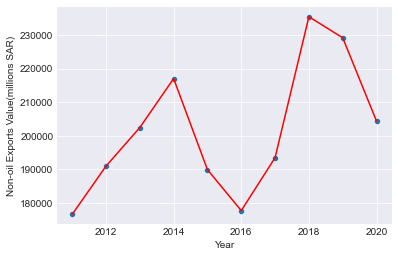

In [230]:

sns.scatterplot(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)'])
sns.lineplot(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)'], color='red')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


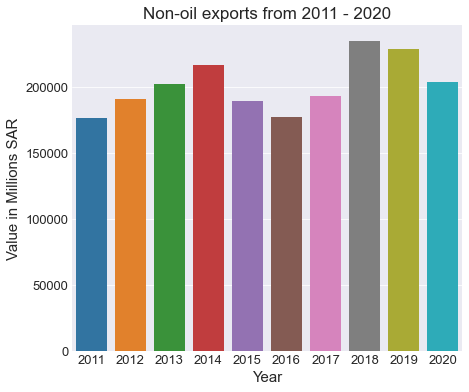

In [222]:

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = [7,6])
sns.barplot(Trading_Oil_non_Oil['Year'] , Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)'])
plt.xlabel('Year',fontsize= 15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.ylabel('Value in Millions SAR', fontsize= 15)
plt.title("Non-oil exports from 2011 - 2020",fontsize= 17 )
plt.savefig('Plots/Non-oil exports from 2011 - 2020.png')
plt.show()


3-	How much is the effect of COVID-19 on the Saudi imports & export?

In [ ]:
# any big drop/decrease in 2020 & 2021 compared to 2019? 


If yes, What are the main areas that got affected? 

4-	How much did the Saudi import & export change from 2011 to 2020?

In [ ]:
# sheet 1-3, compare imports vs exports

6-	What does Saudi export the most? Such as dates, cooking oil, used cars, used clothes?

In [ ]:
# sheet 1.2
# sheet 3-7


7-	What does Saudi import the most? Such as new cars, new clothes, medicine, medical equipment (Masks during covid), etc.

In [ ]:
# sheet 3-4
# sheet 2-1

8-	How much has Saudi been importing & exporting in petrochemicals, medicine, car parts, and vegetables?

In [ ]:
# umm, answer after answering above questions

9-	What are the things that Saudi is planning to produce to lower their dependency on importing? military equipment, cars (electric), etc. 